In [12]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
import numpy as np

In [13]:
def kfoldTrain(url : str) :
    colName = ['x','y', 'class']
    data = pd.read_csv(url, names=colName)

    X = data[['x','y']]
    Y = data['class']

    x_1, x_test, y_1, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    x_train, x_CV, y_train, y_CV = train_test_split(x_1, y_1, test_size=0.3)

    print("\n#################### Dataaset1 #########################")
    for k in range(1, 30, 2):

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)

        pred = model.predict(x_CV)

        acc = (accuracy_score(pred, y_CV, normalize=True))*float(100)

        print("\nCV Accuracy for "+str(k)+" nearest neighbour is "+str(acc))

    model2 = KNeighborsClassifier(1)
    model2.fit(x_train, y_train)
    predicted = model2.predict(x_test)

    accur = (accuracy_score(y_test, predicted, normalize=True))*float(100)
    print("\nAccuracy for "+str(1) +
          " nearest neighbour over Test Data (Unseen) is "+str(acc))


In [16]:
kfoldTrain('/Projects/DataScience-TheNewOil/KNearestNeighbour/DataSets/3.concertriccir2.csv')




#################### Dataaset1 #########################

CV Accuracy for 1 nearest neighbour is 85.71428571428571

CV Accuracy for 3 nearest neighbour is 86.66666666666667

CV Accuracy for 5 nearest neighbour is 86.66666666666667

CV Accuracy for 7 nearest neighbour is 82.85714285714286

CV Accuracy for 9 nearest neighbour is 80.95238095238095

CV Accuracy for 11 nearest neighbour is 78.0952380952381

CV Accuracy for 13 nearest neighbour is 74.28571428571429

CV Accuracy for 15 nearest neighbour is 76.19047619047619

CV Accuracy for 17 nearest neighbour is 75.23809523809524

CV Accuracy for 19 nearest neighbour is 72.38095238095238

CV Accuracy for 21 nearest neighbour is 70.47619047619048

CV Accuracy for 23 nearest neighbour is 70.47619047619048

CV Accuracy for 25 nearest neighbour is 69.52380952380952

CV Accuracy for 27 nearest neighbour is 67.61904761904762

CV Accuracy for 29 nearest neighbour is 64.76190476190476

Accuracy for 1 nearest neighbour over Test Data (Unseen) is 64

In [15]:

kfoldTrain('/Projects/DataScience-TheNewOil/KNearestNeighbour/DataSets/3.concertriccir2.csv')


#################### Dataaset1 #########################

CV Accuracy for 1 nearest neighbour is 88.57142857142857

CV Accuracy for 3 nearest neighbour is 84.76190476190476

CV Accuracy for 5 nearest neighbour is 84.76190476190476

CV Accuracy for 7 nearest neighbour is 87.61904761904762

CV Accuracy for 9 nearest neighbour is 84.76190476190476

CV Accuracy for 11 nearest neighbour is 85.71428571428571

CV Accuracy for 13 nearest neighbour is 83.80952380952381

CV Accuracy for 15 nearest neighbour is 82.85714285714286

CV Accuracy for 17 nearest neighbour is 80.0

CV Accuracy for 19 nearest neighbour is 78.0952380952381

CV Accuracy for 21 nearest neighbour is 78.0952380952381

CV Accuracy for 23 nearest neighbour is 77.14285714285715

CV Accuracy for 25 nearest neighbour is 76.19047619047619

CV Accuracy for 27 nearest neighbour is 73.33333333333333

CV Accuracy for 29 nearest neighbour is 73.33333333333333

Accuracy for 1 nearest neighbour over Test Data (Unseen) is 73.3333333333333

10 fold cross validation


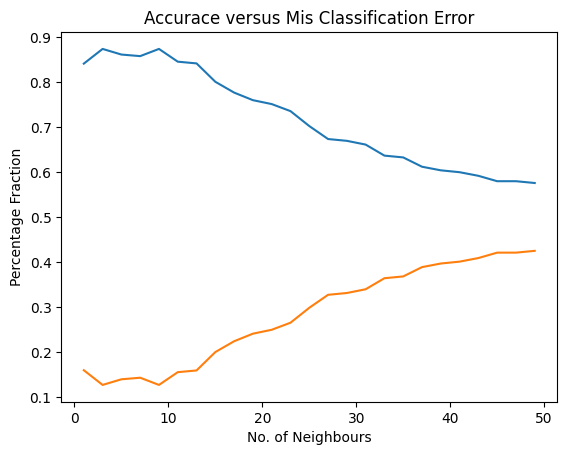

In [8]:
colName = ['x','y', 'class']
data = pd.read_csv('/Projects/DataScience-TheNewOil/KNearestNeighbour/DataSets/3.concertriccir2.csv', names=colName)

X = data[['x','y']]
Y = data['class']

x_1, x_test, y_1, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
x_train, x_CV, y_train, y_CV = train_test_split(x_1, y_1, test_size=0.3)


cv_scores = []
neighbours = np.arange(1,50,2)
for k in neighbours : 
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(x_train,y_train)
    #pred = knn.predict()
    scores = cross_val_score(knn, X = x_train, y = y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]
#print(MSE)

#optimalK = neighbours[cv_scores.index(max(cv_scores))] using Accuracy score
optimalK = neighbours[MSE.index(min(MSE))]

plt.figure()
plt.plot(neighbours, cv_scores)
plt.plot(neighbours, MSE)
plt.xlabel('No. of Neighbours')
plt.ylabel('Percentage Fraction')
plt.title('Accurace versus Mis Classification Error')
#plt.legend()
plt.show()


    
    
    

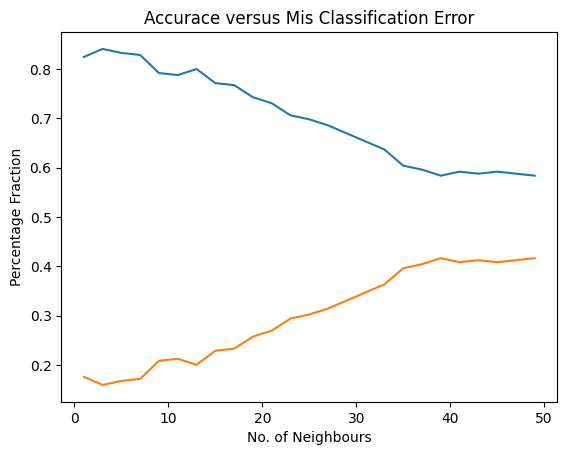

In [9]:
colName = ['x','y', 'class']
data = pd.read_csv('/Projects/DataScience-TheNewOil/KNearestNeighbour/DataSets/3.concertriccir2.csv', names=colName)

X = data[['x','y']]
Y = data['class']

x_1, x_test, y_1, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
x_train, x_CV, y_train, y_CV = train_test_split(x_1, y_1, test_size=0.3)


cv_scores = []
neighbours = np.arange(1,50,2)
for k in neighbours : 
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(x_train,y_train)
    #pred = knn.predict()
    scores = cross_val_score(knn, X = x_train, y = y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]
#print(MSE)

#optimalK = neighbours[cv_scores.index(max(cv_scores))] using Accuracy score
optimalK = neighbours[MSE.index(min(MSE))]

plt.figure()
plt.plot(neighbours, cv_scores)
plt.plot(neighbours, MSE)
plt.xlabel('No. of Neighbours')
plt.ylabel('Percentage Fraction')
plt.title('Accurace versus Mis Classification Error')
plt.show()


    
    
    

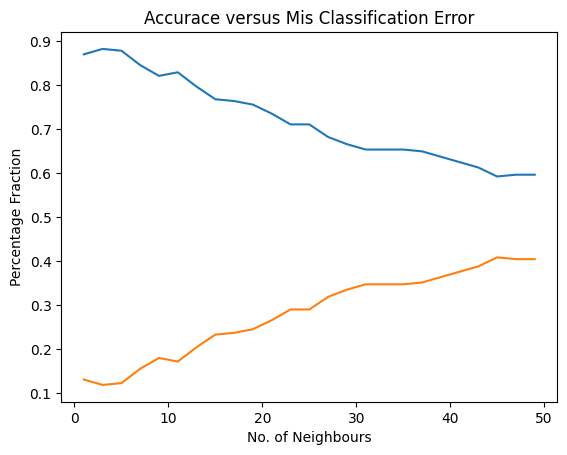

In [11]:
colName = ['x','y', 'class']
data = pd.read_csv('/Projects/DataScience-TheNewOil/KNearestNeighbour/DataSets/3.concertriccir2.csv', names=colName)

X = data[['x','y']]
Y = data['class']

x_1, x_test, y_1, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
x_train, x_CV, y_train, y_CV = train_test_split(x_1, y_1, test_size=0.3)


cv_scores = []
neighbours = np.arange(1,50,2)
for k in neighbours : 
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(x_train,y_train)
    #pred = knn.predict()
    scores = cross_val_score(knn, X = x_train, y = y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]
#print(MSE)

#optimalK = neighbours[cv_scores.index(max(cv_scores))] using Accuracy score
optimalK = neighbours[MSE.index(min(MSE))]

plt.figure()
plt.plot(neighbours, cv_scores)
plt.plot(neighbours, MSE)
plt.xlabel('No. of Neighbours')
plt.ylabel('Percentage Fraction')
plt.title('Accurace versus Mis Classification Error')
plt.show()


    
    
    